# Project: Real estate price prediction using ml


## Data cleaning process
---
### The quality of data direclty affects the final models performance thats why data cleaning is very essential step

## importing required libraries for our project

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotplotlib


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

# version check 


In [87]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import flask

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Flask version:", flask.__version__)


Pandas version: 1.0.5
NumPy version: 1.23.5
Matplotlib version: 3.2.2
Scikit-learn version: 0.22.2.post1
Flask version: 3.0.3


C:\Users\krish\AppData\Local\Temp\ipykernel_15412\3036628125.py:11: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask version:", flask.__version__)


<!-- # version check -->


pd.read_csv() used to read the csv file 
and .head() method is used to show the first 5 rows of that csv by befault u can also mention how many rows you want to see and those rows wil appear

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### now to show the number of rows and coloumns in our data we can use this

.shpae methos shows the no of rows and columns of the csv

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### time to drop the less useful features 

df2 = df1.drop(['area_type','availability','society','balcony'], axis = 'columns') droping this based on columns thats y i need to use axis = columns


In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


we got above 4 most important columns which we will use for data processing and model building 

In [6]:
df2.shape

(13320, 5)

now only 5 columns left as u can see here

### handling null values its the first step of data cleaning for our models happy future 

we use isnull().sum() to check for the null values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

as u can see above there are certain null values so its must to remove or drop them 

dropna() function is used to drop the  null values

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

we cleaned all the null values now as u can see above

In [9]:
df3.shape

(13246, 5)

In [10]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### something is wrong with the size coloumn am i wrong?

as u can see the size columns have unconsistant data which is sometimes no of bhk sometimes no of bedrooms.  we must fix this

.unique() method is used to check for the unique names in that selected column

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

we need to create a new column name bhk which can only have the no of bhk it is not anything else

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\krish\AppData\Local\Temp\ipykernel_15412\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


below we have succesfully created a bhk column

In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


lets check how many unique values are there in bhk 

In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


above u can see that 43 bedrooms for the 2400 total_sqft nah nah somethhing is weiredd 

now check for the total_sqft 

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

this column is also unconsistant

### above we got range lets convertt it

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

### ~  niget operation return df back to us

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


see above that the data total_sqft is not structureed we must neeed to convert it into a single variable

### total_sqft_values are in range like 2100-2850  to get only one value we need to get the avg or mean of it avg = 2100+2850/2 = 2475

### if u can seee properly u may notice wt.... is that total_sqft vallues here and there

### unconsistant data frrr

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [20]:
convert_sqft_to_num('2166')

2166.0

In [21]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [22]:
convert_sqft_to_num('34.46Sq. Meter')

now u can see below the total_sqft

In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

### and now finally we have cleaned our total_sqft data coloumn,handled na values plus we have also removed some features and add new ones

# Feature engineering

### what is fe: fe in data cleaning stands for Feature Engineering, which involves transforming raw data into useful features to improve model performance.

so below we have creted a new feature price_per_sqft

In [25]:
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### lets create a new coloumn name price_per_sqft which will help us in later stage !!
### lets create a new coloumn name price_per_sqft which will help us in later stage !!

In [26]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### location coloumn lets cheack it out, its a tag data 

In [27]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df5.location.unique())

1304

above we have 1304 unique locations and its too much to handle we should handle this unique locations

so we will check how mnay locations have very low data points 
theen we will set a rule like the locations values which are less than 10 data points should be removed or consider as a singele location name which is  other 

In [29]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

lets deleter the locations whose values are less than 10

In [30]:
len(location_stats[location_stats<=10])

1052

so there are 1052 locations out of which are less than the 10 datapoints

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [32]:
len(df5.location.unique())

1293

lets put the values of locations which are less than 10 datapoints to othere catagories

In [33]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

### now we have got only 242 location

In [34]:
df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8114,Sarjapur Road,3 BHK,1900.0,4.0,180.000,3,9473.684211
11651,Hosakerehalli,5 BHK,4500.0,5.0,145.000,5,3222.222222
6453,Rajaji Nagar,3 BHK,2300.0,3.0,369.000,3,16043.478261
6885,Hegde Nagar,3 BHK,1703.0,3.0,125.000,3,7339.988256
411,other,2 BHK,1185.0,2.0,38.000,2,3206.751055
1542,Sarjapur Road,1 BHK,615.0,1.0,17.835,1,2900.000000
635,Kambipura,2 BHK,883.0,2.0,29.000,2,3284.258211
9616,other,4 Bedroom,612.0,3.0,47.000,4,7679.738562
8582,TC Palaya,2 Bedroom,1100.0,2.0,65.000,2,5909.090909
12148,Electronics City Phase 1,3 BHK,1330.0,2.0,44.000,3,3308.270677


In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


see above the size columns has 2 bhk and the total sqft is 1000 nearly so and also 3bhk = 1500 sqft and 4 bhk nearly 2000 so we can see that the 1bhk = nearly 500 sqft based on that we can remove that

# Outlier removal

### An outlier is a data point that is very different from the rest. It can be an error or a rare event.

### Outlier Removal Using Business Logic
###    As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be rem
oved as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft



## so here we will take the minimum threshhold 300

below you can easily say that they outliers cause here 8 bedrooms for 600 sqft not good

In [36]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
df5.shape

(13246, 7)

lets remove the data where bhk whose are less 300 casuse they are  outliers

In [38]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

## here we can also use the describe method which gives us basic but hightly important math calculations 

## its a deescribe() method cause its attched to somedata by .

In [39]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


###  Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

Most normally distributed data lies within ±1 std deviation from the mean.

This keeps typical properties, and drops extreme ones (luxury flats, incorrect data, etc.).

In [40]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

✅ Why is this useful?
It helps:

Spot pricing anomalies (e.g., 3 BHK cheaper than 2 BHK? Something's wrong!)

Understand how price varies with area for different property types

Decide which data points may be outliers worth removing



### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

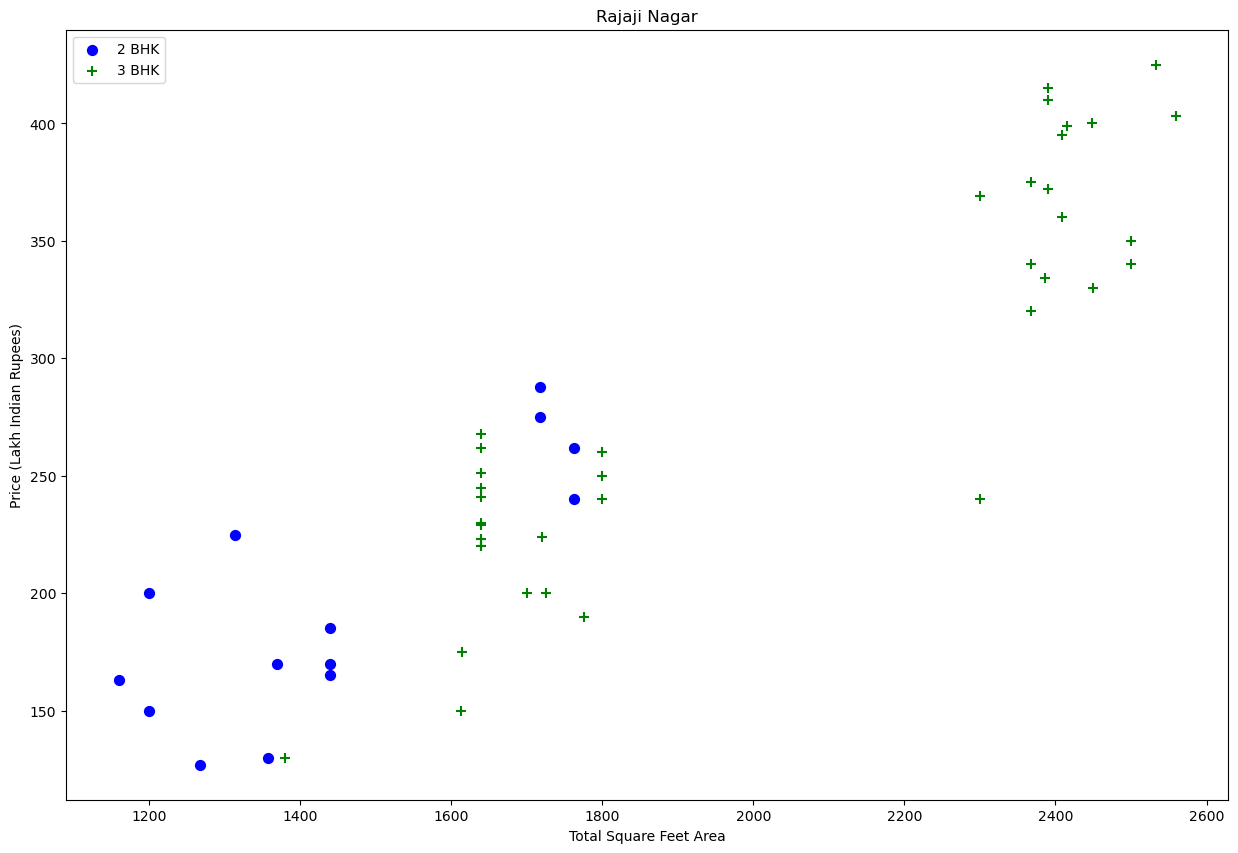

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

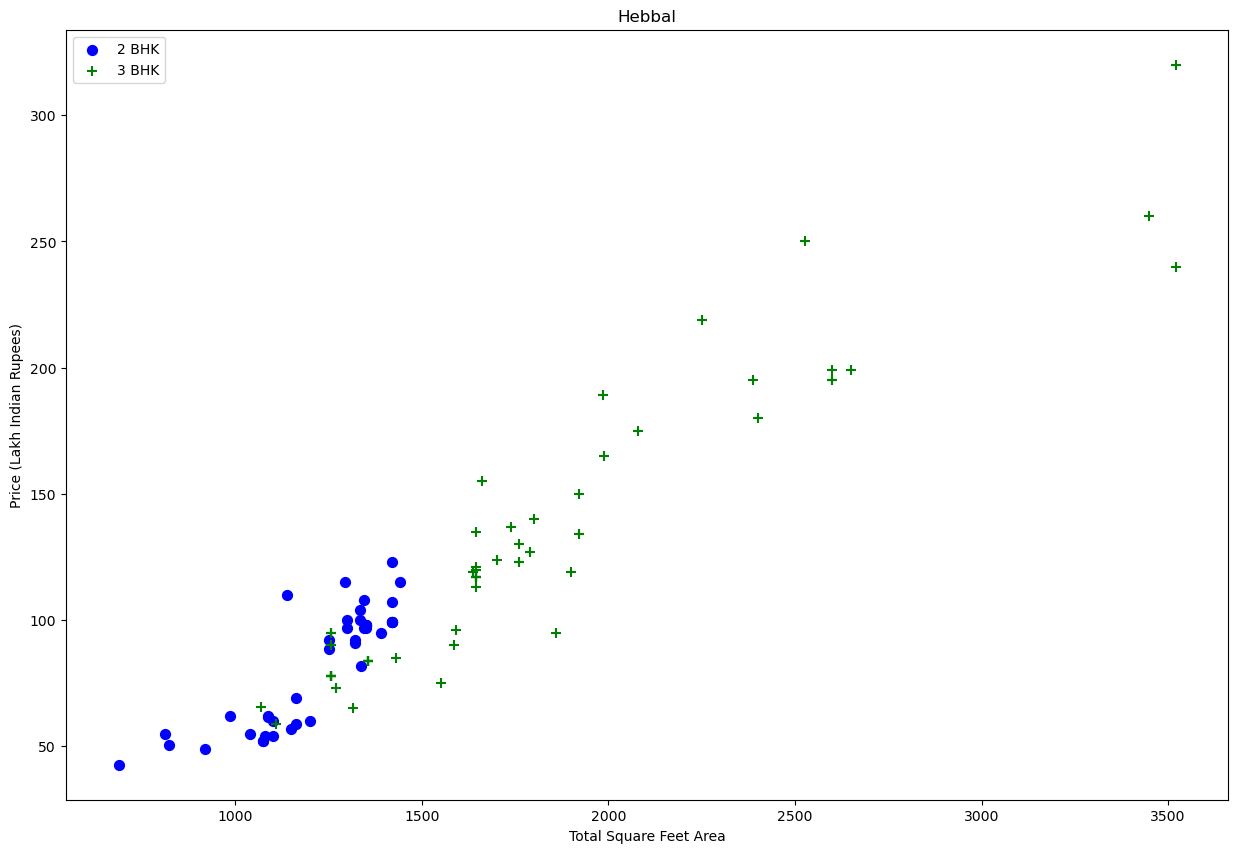

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

### {
###   '1' : {
###  'mean': 4000,
###     'std: 2000,
###       'count': 34
###    },
###    '2' : {
###        'mean': 4300,
###        'std: 2300,
###        'count': 22
###    },    
### }
### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7329, 7)

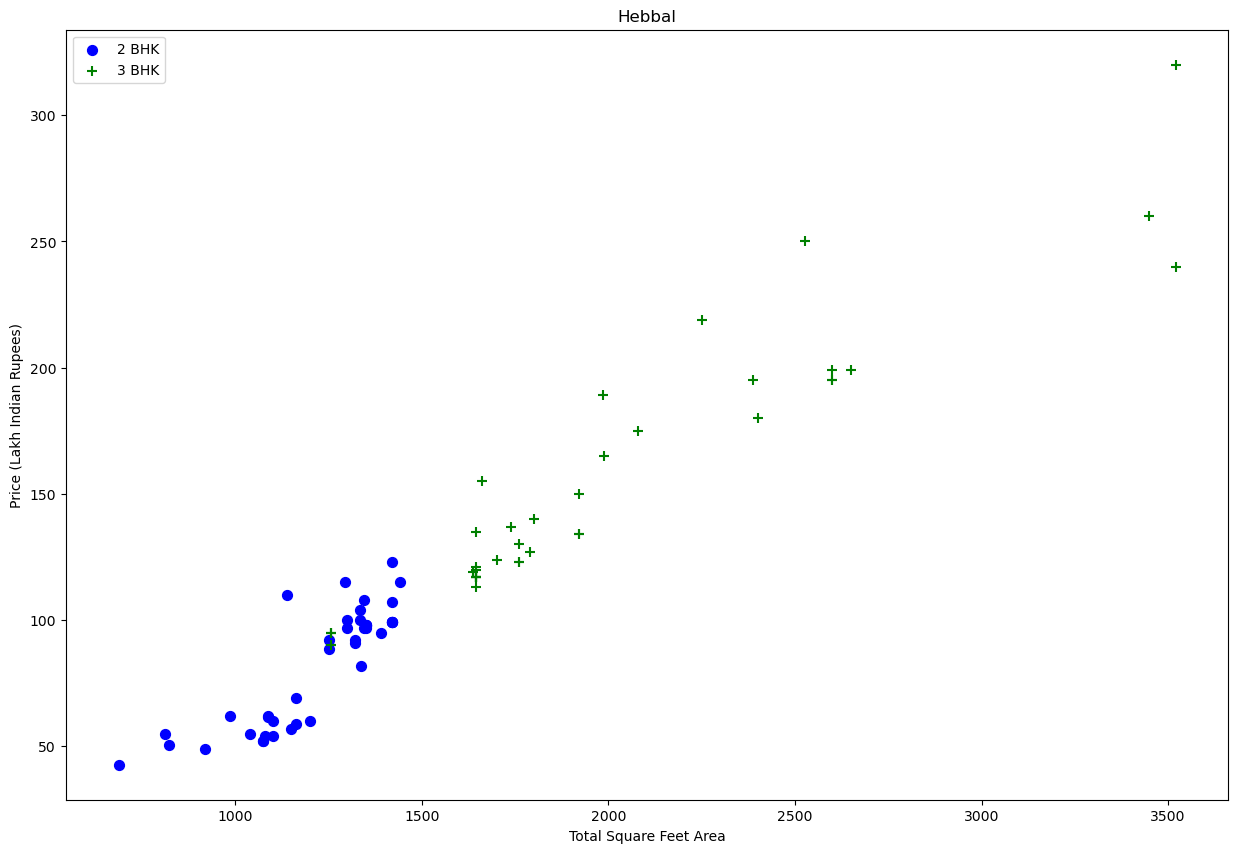

In [44]:
plot_scatter_chart(df8,"Hebbal")

## so here we can say that the majority of the datapoints are betweeen the 0 to 10000 sqft

Text(0, 0.5, 'Count')

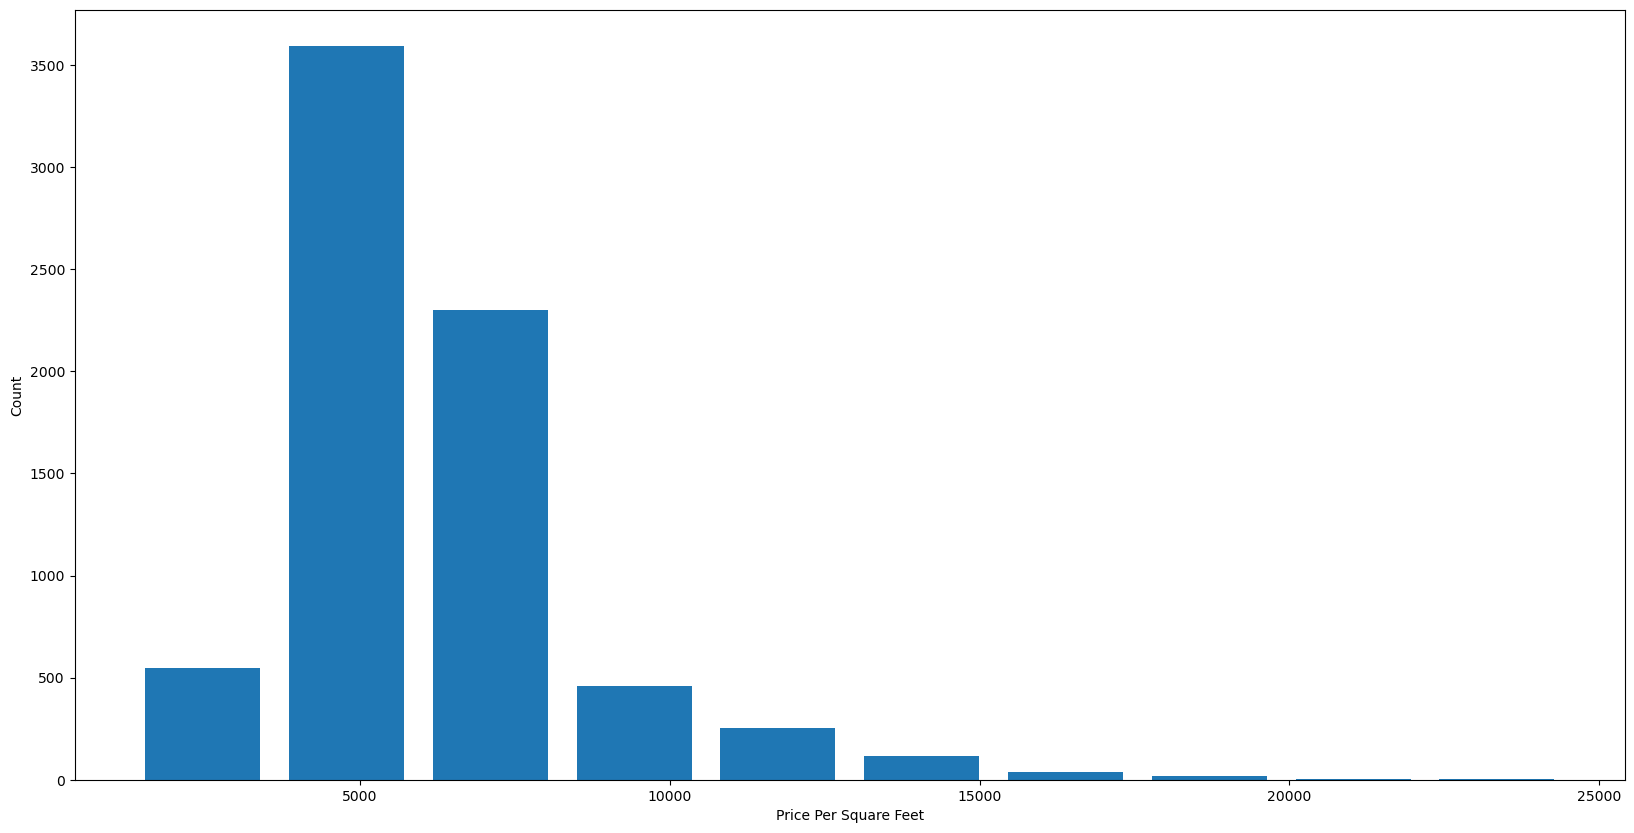

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


most of the propertiess who has 2 to 6 bathrooms so 

Text(0, 0.5, 'Count')

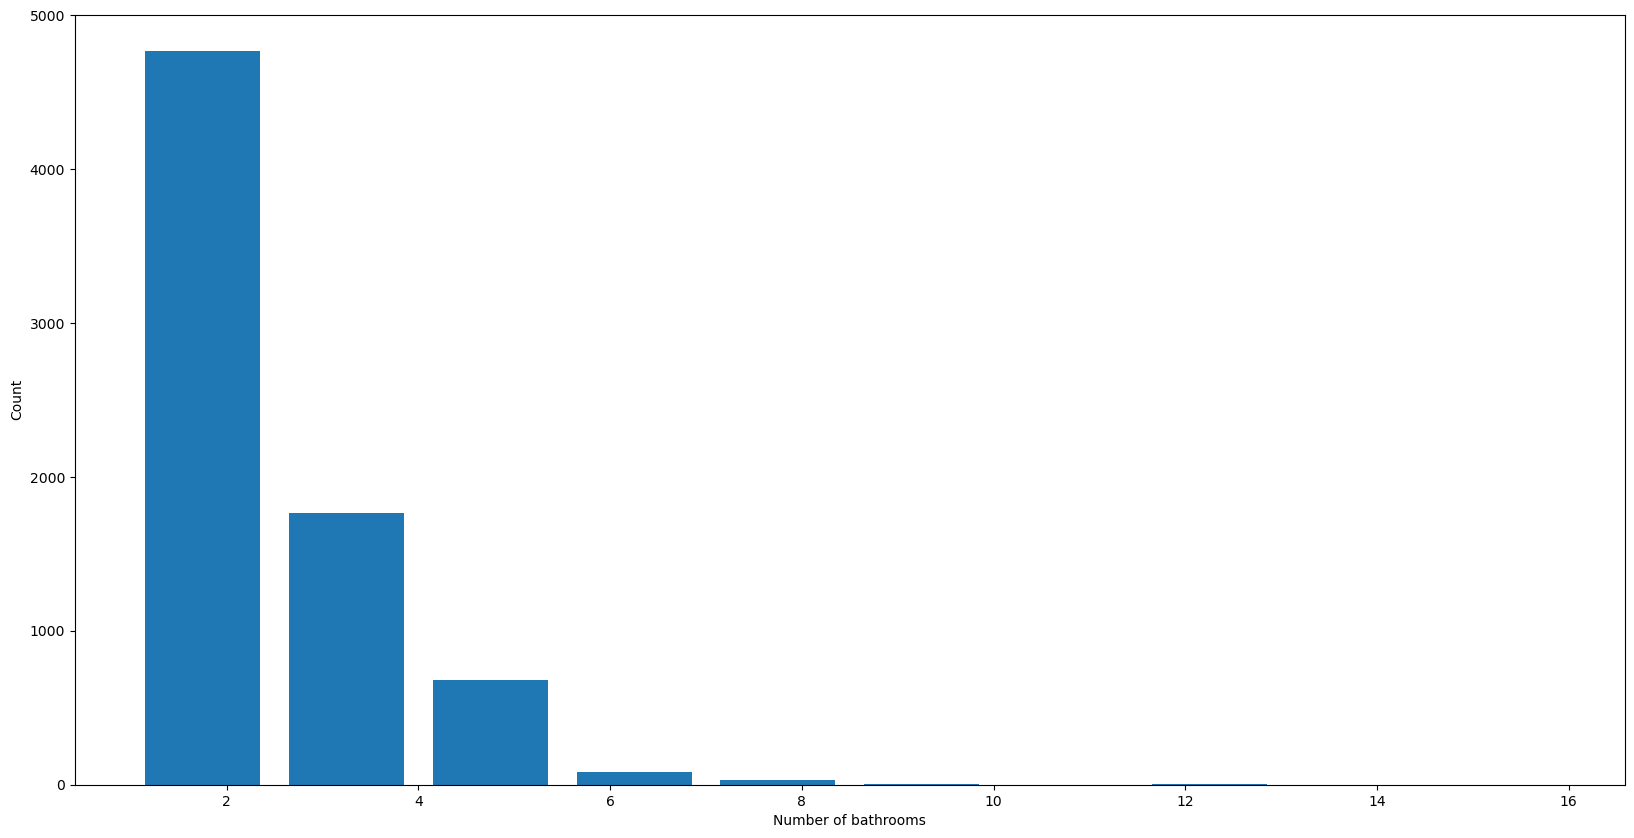

In [48]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

## below lets remove tha datapoints where the bathrooms are greater than bedrooms + 2

In [49]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

time to drop the extra unnessory columns here the size and the price_per_sqft cause we have now bhk columns in place of size and the outliier deteection process is also complete so we can remove the price_per_sqft columsn too 

In [51]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [52]:
df10.to_csv('cleaned_data.csv', index=False)


### Use One Hot Encoding For Location

One Hot Encoding
It's a concept or technique used to convert categorical data into numerical form.

It creates a new column for each unique category, and fills it with 0 or 1.

Example:


Color	→ One Hot Encoding
Red	[1, 0, 0]
Blue	[0, 1, 0]
Green	[0, 0, 1]

get_dummies()
get_dummies() is a Pandas method that performs one hot encoding for you automatically.

It implements the concept of one hot encoding easily in one line.

In [53]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lets drop the othere column

In [54]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12.to_csv('final_cleaned_data.csv', index=False)


In [57]:
df12.shape

(7251, 245)

# Build a Model Now...

In [58]:
df12.shape

(7251, 245)

we need X for our model training 

x is for the input

In [59]:
X = df12.drop(['price'],axis='columns')
X.head(100)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1180.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,1400.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1270.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,2503.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Y is for the price

In [60]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

we need to immport the train_test_split method 
here the 80 percent is for the training purpose and the 20 for the testing

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## below lets create a linear regression model 


from sklearn.linear_model import LinearRegression
➔ Import the Linear Regression tool from scikit-learn.

lr_clf = LinearRegression()
➔ Create an empty Linear Regression model.

lr_clf.fit(X_train, y_train)
➔ Train the model using training data (learn patterns).

lr_clf.score(X_test, y_test)
➔ Check model’s accuracy (R² score) on test data.

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.845227769787433

### Use K Fold cross validation to measure accuracy of our LinearRegression model

What Happens Internally:
Split the data into 5 equal parts.

Train on 4 parts and test on 1 part.

Repeat this process 5 times, with each part being used as the test set once.

The R² score for each fold is returned, and you can compute the average to get the overall model performance.

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Underfitting
Underfitting occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance. It fails to learn enough from the training data, resulting in low accuracy on both training and test data.

Overfitting
Overfitting occurs when a model is too complex, capturing not just the patterns but also the noise in the training data. It performs well on the training data but poorly on unseen test data because it cannot generalize well.

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

We use GridSearchCV to find the best combination of hyperparameters for a machine learning model

Hyperparameters are settings you choose before training a machine learning model — they are not learned from data.

In [64]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    # Convert X to DataFrame if it's not already
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {  
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)  
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores)


In [65]:
# Call the function and capture the results
scores_df = find_best_model_using_gridsearchcv(X_train, y_train)

# Print the DataFrame
print(scores_df)


c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\

               model  best_score  \
0  linear_regression    0.846190   
1              lasso    0.697308   
2      decision_tree    0.719243   

                                         best_params  
0                           {'fit_intercept': False}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def find_best_model_with_rf(X_train, X_test, y_train, y_test):
    X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
    X_test = pd.DataFrame(X_test) if not isinstance(X_test, pd.DataFrame) else X_test

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['squared_error', 'friedman_mse'], 'splitter': ['best', 'random']}
        },
        'random_forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
        }
    }

    results = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"Training {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)

        best_model = gs.best_estimator_
        y_pred = best_model.predict(X_test)

        results.append({
            'model': algo_name,
            'best_params': gs.best_params_,
            'cv_best_score': gs.best_score_,
            'test_r2': r2_score(y_test, y_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'test_mae': mean_absolute_error(y_test, y_pred)
        })

    return pd.DataFrame(results)

# Example usage:
# scores_df = find_best_model_with_rf(X_train, X_test, y_train, y_test)
# print(scores_df)


In [67]:
# Call the new function with Random Forest included
scores_df = find_best_model_with_rf(X_train, X_test, y_train, y_test)

# Print the DataFrame to see all models with CV and test metrics
print(scores_df)


Training linear_regression...
Training lasso...
Training decision_tree...


c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\envs\scikit-env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\krish\.conda\

Training random_forest...
               model                                        best_params  \
0  linear_regression                           {'fit_intercept': False}   
1              lasso                {'alpha': 1, 'selection': 'random'}   
2      decision_tree  {'criterion': 'friedman_mse', 'splitter': 'best'}   
3      random_forest             {'max_depth': 20, 'n_estimators': 100}   

   cv_best_score   test_r2  test_rmse   test_mae  
0       0.846190  0.845703  27.943902  16.605049  
1       0.697268  0.723399  37.414081  22.194494  
2       0.670004  0.723432  37.411863  19.884367  
3       0.779412  0.804853  31.426005  16.962739  


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def find_best_model_advanced(X_train, X_test, y_train, y_test):
    X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
    X_test = pd.DataFrame(X_test) if not isinstance(X_test, pd.DataFrame) else X_test

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'ridge': {
            'model': Ridge(),
            'params': {'alpha': [0.01, 0.1, 1, 10, 50], 'fit_intercept': [True, False]}
        },
        'lasso': {
            'model': Lasso(max_iter=10000),
            'params': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'fit_intercept': [True, False]}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {'criterion': ['squared_error', 'friedman_mse'], 'splitter': ['best', 'random']}
        },
        'random_forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"Training {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', n_jobs=-1, return_train_score=False)
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_
        y_pred = best_model.predict(X_test)

        results.append({
            'model': algo_name,
            'best_params': gs.best_params_,
            'cv_best_score': gs.best_score_,
            'test_r2': r2_score(y_test, y_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'test_mae': mean_absolute_error(y_test, y_pred)
        })

    return pd.DataFrame(results)

# Example usage:
# scores_df = find_best_model_advanced(X_train, X_test, y_train, y_test)
# print(scores_df.sort_values(by='test_r2', ascending=False).reset_index(drop=True))


In [69]:
# Run all models with advanced linear model tuning
scores_df = find_best_model_advanced(X_train, X_test, y_train, y_test)

# Display the results sorted by test R² (best first)
print(scores_df.sort_values(by='test_r2', ascending=False).reset_index(drop=True))


Training linear_regression...
Training ridge...
Training lasso...
Training decision_tree...
Training random_forest...
               model                                        best_params  \
0              lasso           {'alpha': 0.001, 'fit_intercept': False}   
1              ridge               {'alpha': 1, 'fit_intercept': False}   
2  linear_regression                           {'fit_intercept': False}   
3      random_forest             {'max_depth': 20, 'n_estimators': 100}   
4      decision_tree  {'criterion': 'friedman_mse', 'splitter': 'best'}   

   cv_best_score   test_r2  test_rmse   test_mae  
0       0.846409  0.846239  27.895316  16.543628  
1       0.847490  0.845905  27.925612  16.386110  
2       0.846190  0.845703  27.943902  16.605049  
3       0.779412  0.804853  31.426005  16.962739  
4       0.662568  0.717284  37.825401  19.860459  


In [70]:
from sklearn.linear_model import Lasso

# Create Lasso model (alpha is the regularization strength)
lasso_clf = Lasso(alpha=0.001, max_iter=10000)  # alpha from your tuned results

# Fit the model
lasso_clf.fit(X_train, y_train)

# Evaluate R² on test set
r2_score = lasso_clf.score(X_test, y_test)
print("Test R²:", r2_score)


Test R²: 0.8454884869797513


In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are ready

# Step 1: Create pipeline with scaling and Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scales features
    ('lasso', Lasso(max_iter=10000))
])

# Step 2: Define grid for alpha (regularization strength)
param_grid = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Step 3: GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Step 4: Evaluate on test set
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Best alpha:", grid.best_params_)
print("Test R²:", r2)
print("Test RMSE:", rmse)
print("Test MAE:", mae)


Best alpha: {'lasso__alpha': 0.01}
Test R²: 0.8454391796349348
Test RMSE: 27.967768910314177
Test MAE: 16.557278228154917


### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

### Test the model for few properties

In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [73]:
def predict_price_lasso(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lasso_clf.predict([x])[0]


✅ Summary:

Lasso = Linear Regression + L1 regularization.

Hyperparameter tuning (alpha) = finding the best strength of that regularization.

It’s a full model/algorithm, not just a tweak.

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Define cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Define Lasso model
lasso_model = Lasso(alpha=0.001, max_iter=10000)  # use your tuned alpha

# Compute cross-validation scores
scores = cross_val_score(lasso_model, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Mean CV R²:", scores.mean())


Cross-validation scores: [0.82377122 0.77175969 0.85120047 0.80840139 0.8365435 ]
Mean CV R²: 0.8183352538264094


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Define cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Define Linear Regression model
lr_model = LinearRegression()

# Compute cross-validation scores
scores = cross_val_score(lr_model, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Mean CV R²:", scores.mean())


Cross-validation scores: [0.82430186 0.77166234 0.85089567 0.80837764 0.83653286]
Mean CV R²: 0.8183540750696059


In [76]:
predict_price_lasso('1st Phase JP Nagar', 1000, 2, 2)


83.0519567904885

In [77]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677185974

In [78]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519395212634

In [79]:
predict_price('Indira Nagar',1000, 2, 2)

181.2781548400676

In [80]:
predict_price_lasso('Indira Nagar',1000, 2, 2)

180.93974254852515

In [81]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033418

### Export the tested model to a pickle file

This pickle file will store the trained model, which you can later load and use for predictions or further processing without needing to retrain the model each time.

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
# lasso pickle file

In [84]:
import pickle

# Save the trained Lasso model
with open('banglore_home_prices_lasso_model.pickle', 'wb') as f:
    pickle.dump(lasso_clf, f)



### Export location and column information to a file that will be useful later on in our prediction application

In [85]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))